# Very Simple Vortex Model (VSVM)
_sits in VortexModel.py lib_

This model uses pressure field as boundary condition and builds velocity using geostrophic balance equation. 

\begin{equation*}
u = -\frac{1}{f\rho} \frac{\partial P}{\partial y} \\\
v = +\frac{1}{f\rho} \frac{\partial P}{\partial x} \\\
\end{equation*}

The pressure field forms as 2D Gaussian. Coriolis parameter ($f$) and density ($\rho$) are constant. Everything is static and horizontally flat (2D).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%config InlineBackend.figure_format = 'retina'

Grid settings

In [3]:
N = 120
x_start, x_end = -2.0, 2.0
y_start, y_end = -2.0, 2.0

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

Initial pressure settings. Using 2D Gussian destribution to form the pressure field. And making it as depression in Pa. 

In [4]:
# initial pressure settings
variance = 0.3    # radius
center = [ 0, 0 ] # location
alpha = 1000.     # amplitude of 

pos = np.dstack((X, Y))
p = 101500. - alpha*st.multivariate_normal.pdf(pos, mean=center, cov=np.eye(2) * variance)

Plot the pressure

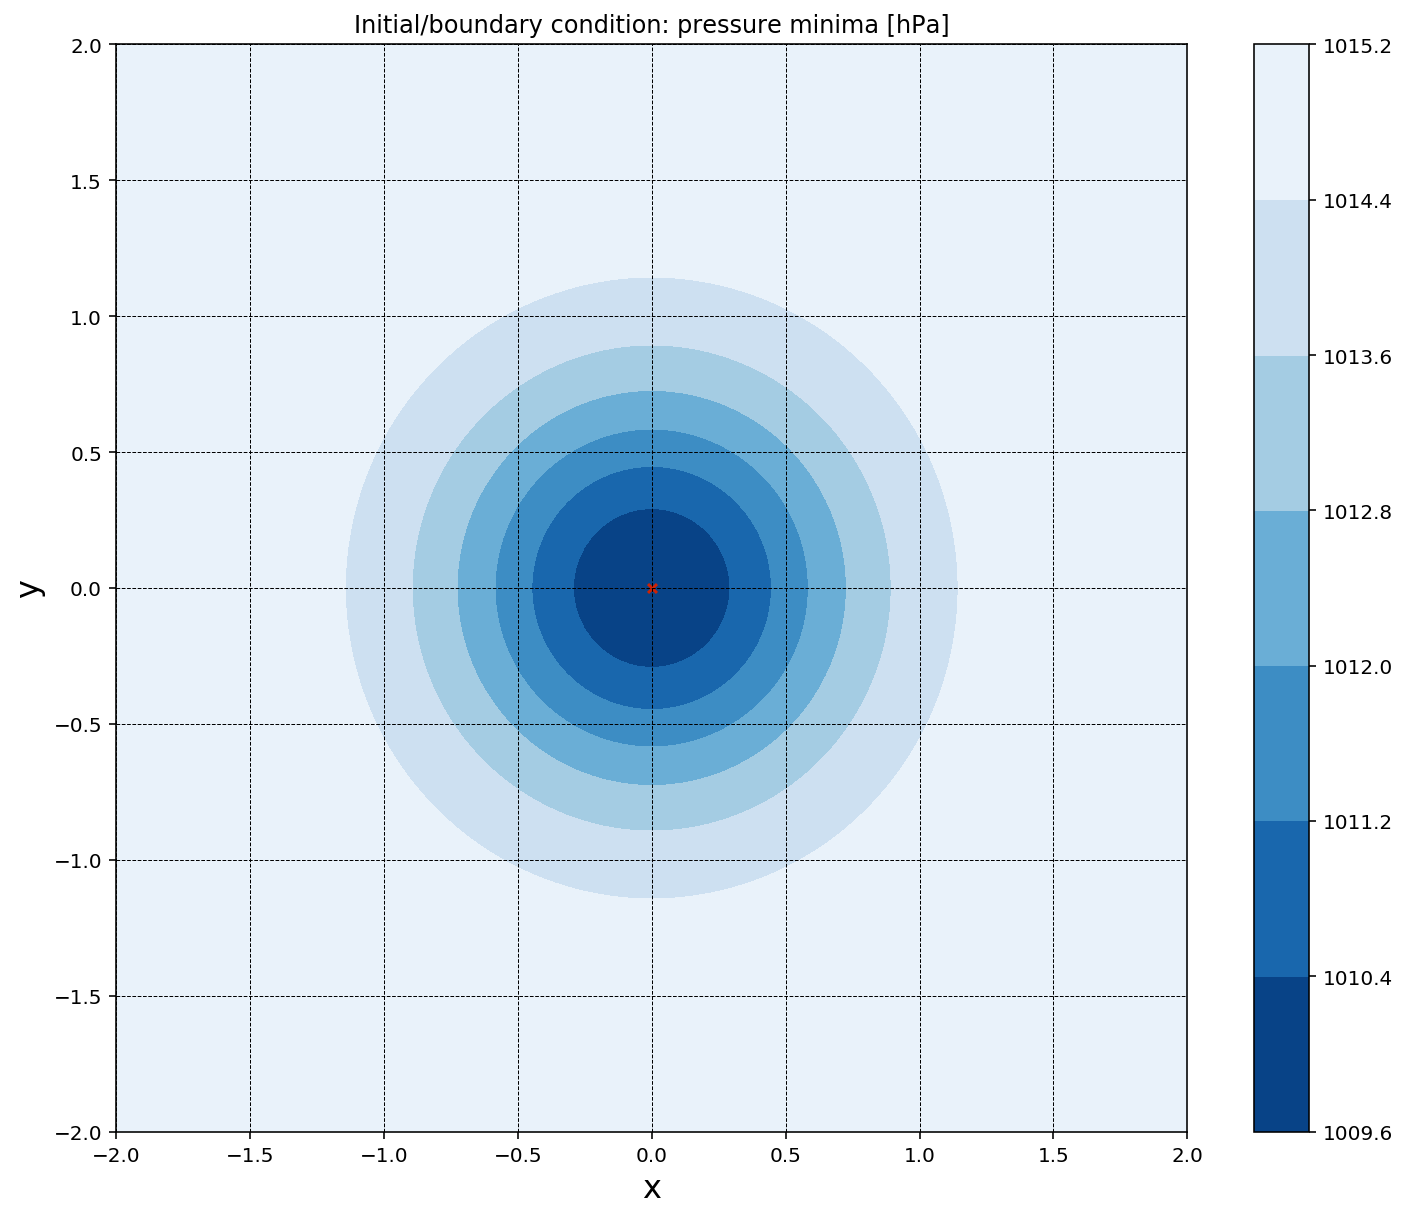

In [5]:
size=12

fig = plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size-2))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.grid(color='black', linestyle='--', linewidth=0.5)

plt.title("Initial/boundary condition: pressure minima [hPa]")

plt.contourf(X, Y, p/100, cmap='Blues_r')
plt.colorbar()
# plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->', color='k')
plt.scatter(center[0], center[1], color='#CD2305', s=20, marker='x')
plt.show()

Compute the velocity using geostropic balance equation...

In [6]:
f = 10**-4 # midlats 
rho = 1.   # density is constant

# Disturbing the vortex with
# ubg = np.linspace(0.0, 5.0, num=N) # Couette flow at the backgroung
ubg = np.full(N, 2) # ... or flat flow 

dpdx = np.gradient(p, 20000, axis=1) # 1 is row in python
dpdy = np.gradient(p, 20000, axis=0) # 0 is column in python

u = -1./(f*rho)*dpdy + ubg[:, None]
v = +1./(f*rho)*dpdx

# когда прибавляешь к симметричной матрице вектор, то сложение идет к последнему (!!!) измерению

Plot the result

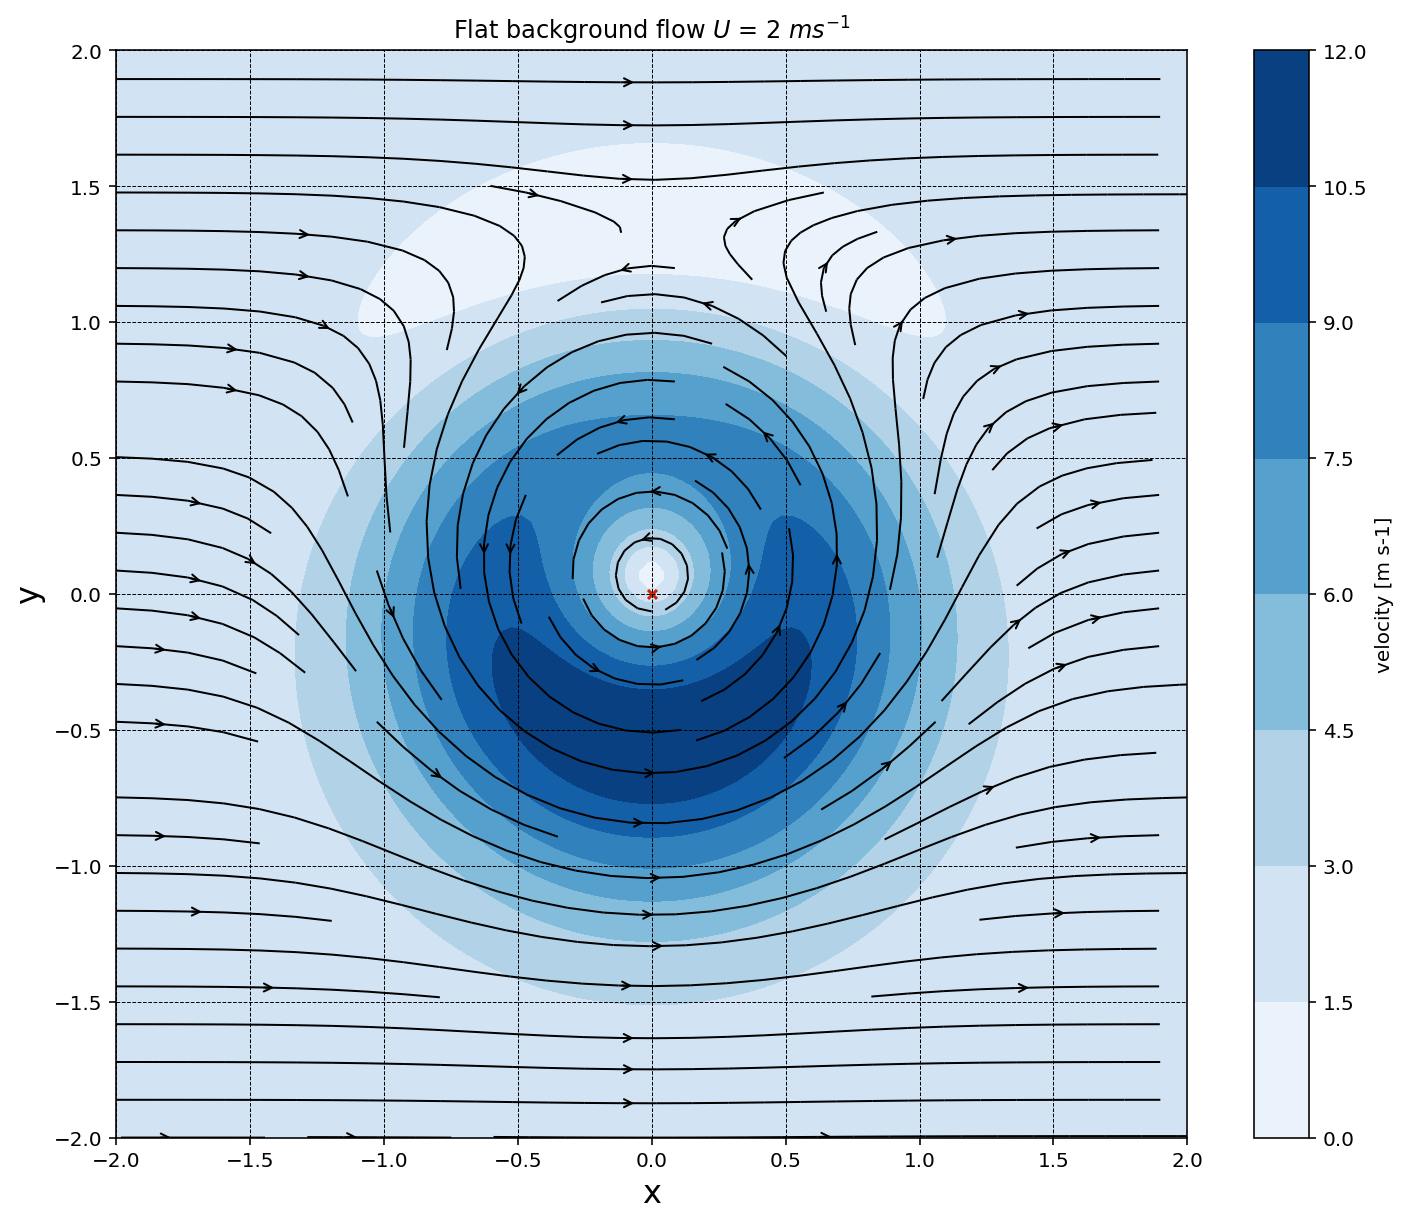

In [7]:
size=12

fig = plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size-2))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.grid(color='black', linestyle='--', linewidth=0.5)

# plt.title("Couette background flow $U_{max}$ = 5 $ms^{-1}$")
plt.title("Flat background flow $U$ = 2 $ms^{-1}$")


plt.contourf(X, Y, np.sqrt(u**2+v**2), cmap='Blues') # 20, vmin=0,vmax=13, 
cbar = plt.colorbar()
cbar.ax.set_ylabel('velocity [m s-1]')

plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->', color='k')
plt.scatter(center[0], center[1], color='#CD2305', s=20, marker='x')
plt.show()